# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie, oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie, etc.). Szybko jednak stwierdziliśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

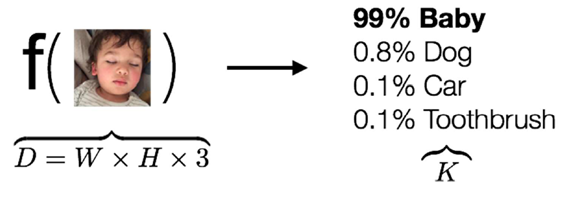


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów, itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). I tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu, oraz mniejszej, nazywanej filtrem (lub kernelem. Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu, i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. [Przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

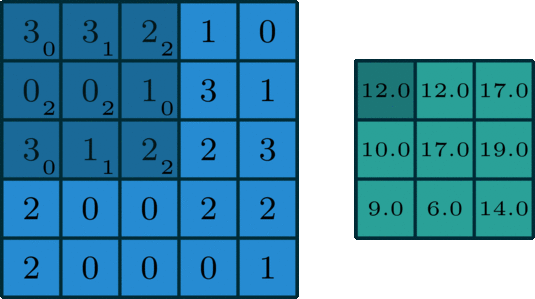

### Stride

Stride to inaczej *krok algorytmu*, albo *przesunięcie*. Określa co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1 a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


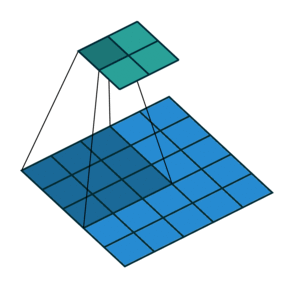



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej, niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami, albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramkną.

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

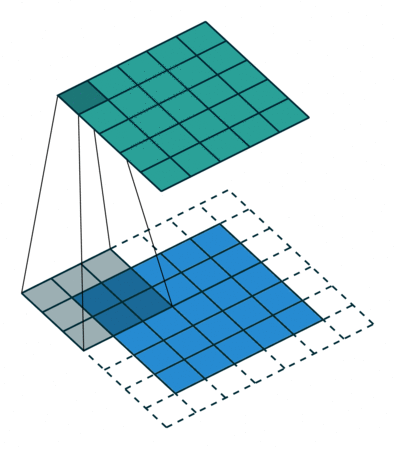

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu.
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

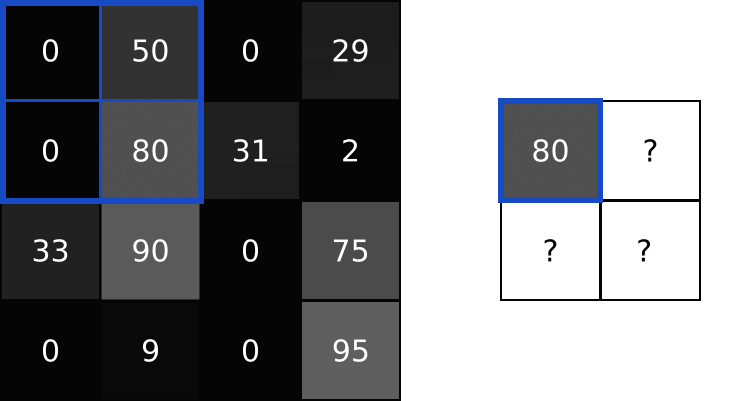

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*,
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych, na podstawie danych treningowych,
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw, zgodnie z nazwą, z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jendak po warstawch poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz. Musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielkowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia.
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

# device = torch.device('cpu')

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami.

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torch-owe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batch-ach podczas treningu.

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True
)

classes = (
    "top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

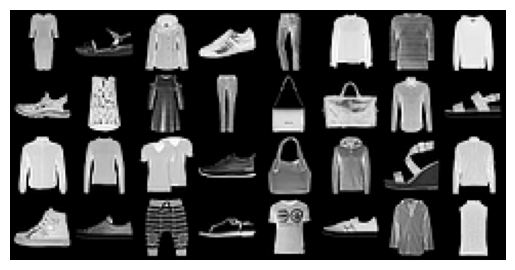

Dress      Sandal     Coat       Sneaker    Trouser    Shirt      Pullover   Pullover  
Sandal     Shirt      Dress      Trouser    Bag        Bag        Shirt      Sandal    
Coat       Pullover   top        Sneaker    Bag        Pullover   Sandal     Coat      
Sneaker    Sneaker    Trouser    Sandal     top        Sneaker    Coat       Pullover  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

def grid_show(images, nrow=8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))


def print_grid(labels, nrow=8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))

grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- warstwa w pełni połączona, 120 neuronów na wyjściu
- warstwa w pełni połączona, 84 neurony na wyjściu
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas

**Zadanie 1 (2 punkty)**

Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps)
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps)
- w pierwszej warstwie gęstej użyj 300 neuronów
- w drugiej warstwie gęstej użyj 100 neuronów

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.custom_model = nn.Sequential(
            nn.Conv2d(1, 20, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(20, 50, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(800, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, len(classes)),
        )

    def forward(self, x):
        return self.custom_model(x)




Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty Categorical Cross Entropy. W PyTorch-u funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [ ]:
import torch.optim as optim

net = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**Zadanie 2 (1 punkt)**

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [ ]:
net.train()

for epoch in range(5):
  for X_batch, y_batch in trainloader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    y_pred = net(X_batch)
    loss = criterion(y_pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Zobaczmy na kilku przykładach jak działa wytrenowana sieć.

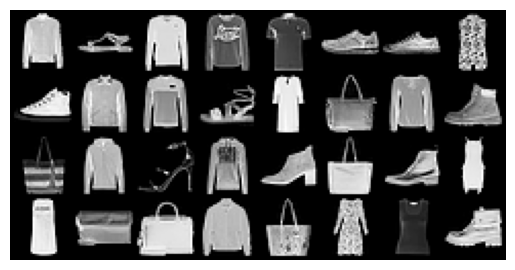

Ground Truth
Coat       Sandal     Pullover   Pullover   top        Sneaker    Sneaker    Shirt     
Sneaker    Coat       Pullover   Sandal     Dress      Bag        Shirt      Ankle boot
Bag        Coat       Sandal     Pullover   Ankle boot Bag        Ankle boot Dress     
top        Bag        Bag        Coat       Bag        Dress      top        Ankle boot

Predicted
Coat       Sandal     Pullover   Pullover   top        Sneaker    Sneaker    top       
Sneaker    Coat       Pullover   Sandal     Dress      Bag        Pullover   Ankle boot
Bag        Coat       Sandal     Pullover   Ankle boot Bag        Ankle boot Dress     
Dress      Bag        Bag        Coat       Bag        Dress      top        Ankle boot


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [ ]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        # print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 81 %


Skomentuj wyniki:

*   Uzykaliśmy dokładność rozpoznanych obrazów na poziomie 80% czyli 1 na 5 jest predykowany błędnie. Jak na stosunkowo niewiele zasobów wykorzystanych do treningu, myślę że ta dokładność jest całkiem niezła.

Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

**Zadanie 3 (1 punkt)**

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [ ]:
net.eval()

with torch.no_grad():
  predicted_correctly = [0 for _ in range(len(classes))]
  number_of_observations = [0 for _ in range(len(classes))]
  for images, labels in testloader:
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)
    max_val, predicted = torch.max(outputs, 1)
    for pred, label in zip(predicted, labels):
      if pred == label:
        predicted_correctly[label] += 1
      number_of_observations[label] += 1

  for i in range(len(classes)):
    acc = 100.0 * predicted_correctly[i]/number_of_observations[i]
    print(f"Accuracy for {classes[i]} = {acc}%")



Accuracy for top = 81.3%
Accuracy for Trouser = 95.5%
Accuracy for Pullover = 69.1%
Accuracy for Dress = 84.9%
Accuracy for Coat = 74.0%
Accuracy for Sandal = 94.0%
Accuracy for Shirt = 38.3%
Accuracy for Sneaker = 92.1%
Accuracy for Bag = 91.1%
Accuracy for Ankle boot = 94.2%


Skomentuj wyniki:

*   Wszystkie wyniki są naprawdę wysokie, poza Shirt i Pullover, najwyraźniej model kiepsko radzi sobie z koszulkami i swetrami

## Detekcja obiektów

Problem detekcji polega na nie tylko sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy doczynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana możemy z niej skorzystać "prosto z pudełka".

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy jak z tego skorzystać.

In [ ]:
from torchvision.models import detection
import numpy as np
import cv2
from PIL import Image
import urllib

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się do testowania działania sieci.

In [ ]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [ ]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Inizjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone jak i RCNN.

In [ ]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes)
).to(device)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów.

Do pobierania obrazów możemy się posłyżyć wget-em.

In [ ]:
# Pobieranie obrazka z sieci
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

--2023-12-07 08:25:46--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338300 (330K) [image/jpeg]
Saving to: ‘toothbrushes.jpg’

toothbrushes.jpg    100%[===================>] 330.37K  --.-KB/s    in 0.1s    

2023-12-07 08:25:46 (2.77 MB/s) - ‘toothbrushes.jpg’ saved [338300/338300]



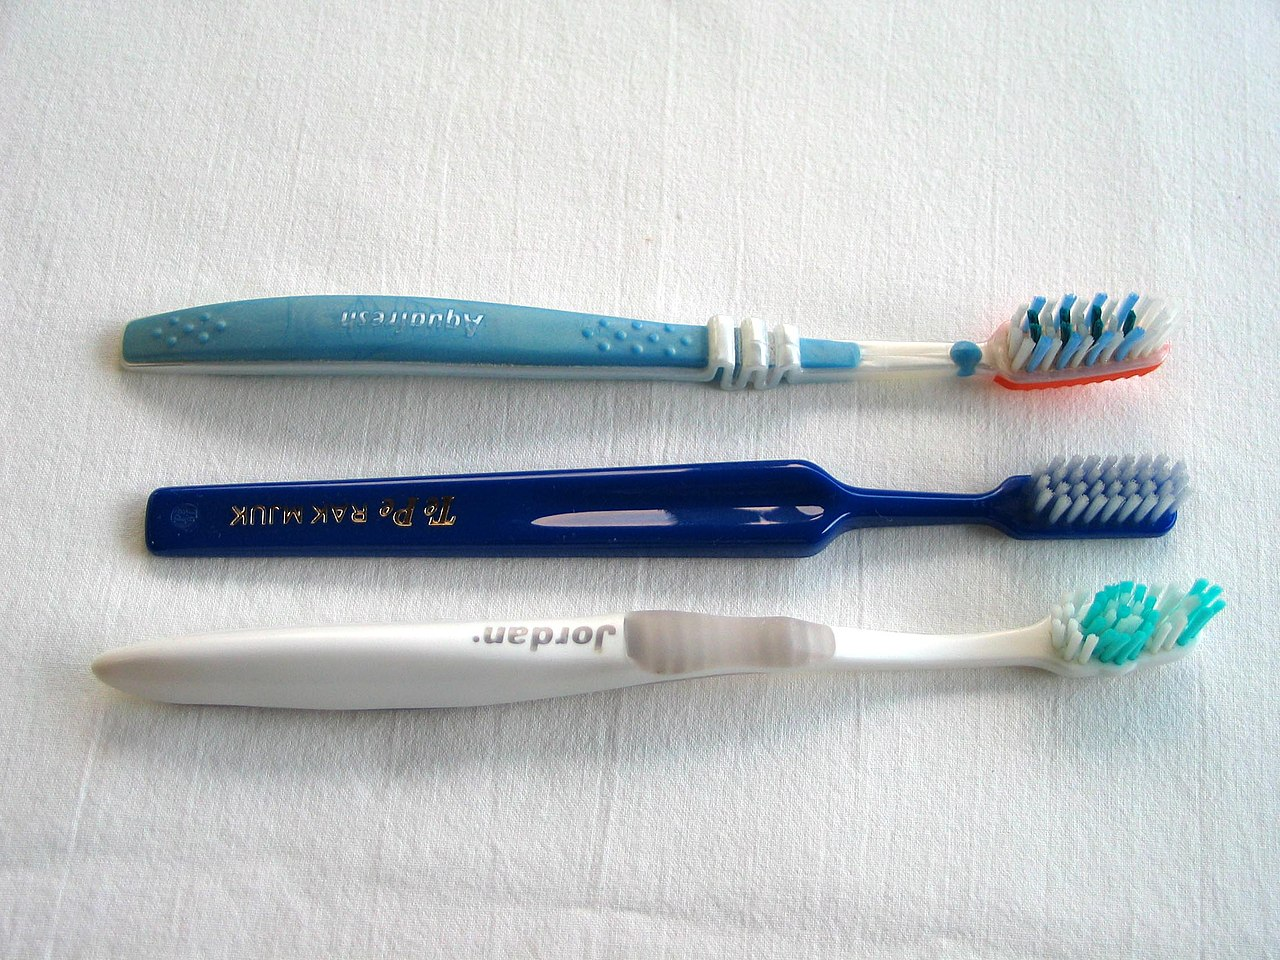

In [ ]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")
# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor
- zmienić kolejność kanałów
- podzielić wartości pikseli przez 255

In [ ]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor  # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255
image_tensor.shape, image_tensor.dtype

(torch.Size([3, 960, 1280]), torch.float32)

**Zadanie 4 (1 punkt)**

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te bounding boxy, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

Bounding Box 1: Class toothbrush, Probability: 94.17%
Bounding Box 2: Class toothbrush, Probability: 88.41%
Bounding Box 3: Class spoon, Probability: 69.83%
Bounding Box 4: Class toothbrush, Probability: 63.00%


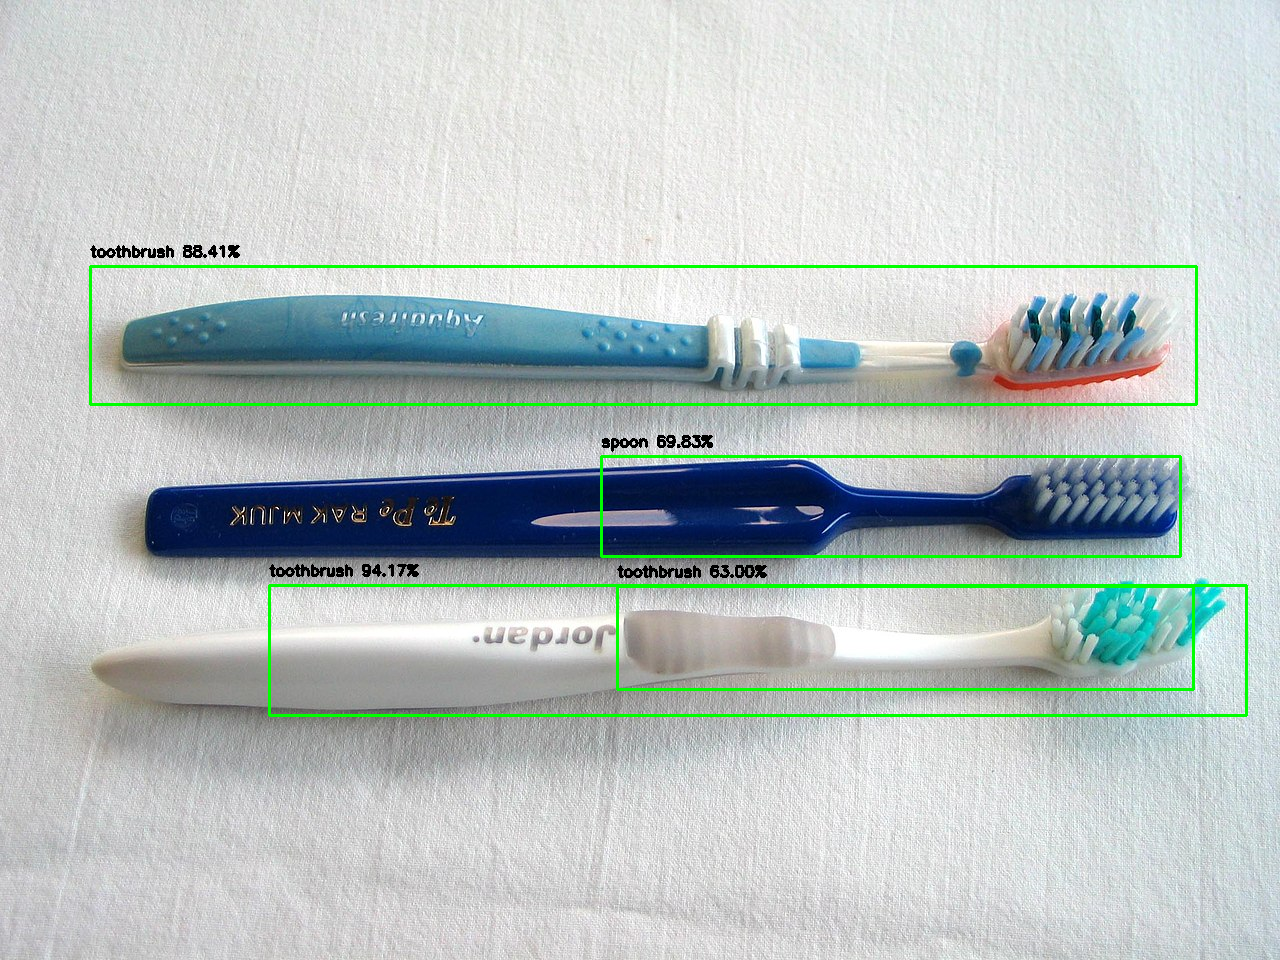

In [ ]:
from PIL import Image
from IPython.display import display

with torch.inference_mode():
    image_tensor = image_tensor.to(device)
    predictions = model([image_tensor])

threshold = 0.5
filtered_boxes = []
for i in range(len(predictions[0]['boxes'])):
    if predictions[0]['scores'][i] > threshold:
        filtered_boxes.append(predictions[0]['boxes'][i])

for i, box in enumerate(filtered_boxes):
    score = predictions[0]['scores'][i].item() * 100
    class_id = int(predictions[0]['labels'][i])
    class_name = classes[class_id]
    print(f"Bounding Box {i+1}: Class {class_name}, Probability: {score:.2f}%")

image_np = np.array(image)
for i, box in enumerate(filtered_boxes):
    box = [int(coord) for coord in box]
    cv2.rectangle(image_np, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    score = predictions[0]['scores'][i].item() * 100
    class_id = int(predictions[0]['labels'][i])
    class_name = classes[class_id]

    cv2.putText(image_np, f"{class_name} {score:.2f}%", (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


image_pil = Image.fromarray(image_np)
display(image_pil)

## Fine-tuning i pretrening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak, nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywaać je do naszych problemów. Działanie takie nazywa się transfer learning-iem.

Przykładowao: mamy już wytrenowaną sieć na dużym zbiorze danych (pretrening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja), albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pretrenowanej na zbiorze ImageNet.

In [ ]:
# Download the hotdog dataset
!wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
!unzip -n hotdog.zip

--2023-12-07 08:27:17--  http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
Resolving d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)... 108.156.118.222
Connecting to d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)|108.156.118.222|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261292301 (249M) [application/zip]
Saving to: ‘hotdog.zip.1’

hotdog.zip.1        100%[===================>] 249.19M  31.6MB/s    in 8.4s    

2023-12-07 08:27:26 (29.7 MB/s) - ‘hotdog.zip.1’ saved [261292301/261292301]

Archive:  hotdog.zip


Kiedy korzystamy z sieci pretrenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229,
0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

```

In [ ]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [ ]:
pretrained_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

In [ ]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

**Zadanie 5 (1 punkt)**

Dodaj warstwę liniową do naszej fine-fune'owanej sieci oraz zainicjuj ją losowymi wartościami.

In [ ]:
new_linear_layer = nn.Linear(pretrained_net.fc.out_features, 2)
num_input_features = new_linear_layer.in_features
num_output_features = new_linear_layer.out_features

new_linear_layer.weight.data = torch.rand(num_output_features, num_input_features)
new_linear_layer.bias.data = torch.rand(num_output_features)

finetuned_net = nn.Sequential(
    pretrained_net,
    new_linear_layer
)

# new_linear_weights = finetuned_net[-1].weight
# new_linear_biases = finetuned_net[-1].bias

# print("Weights:")
# print(new_linear_weights)

# print("\nBiases:")
# print(new_linear_biases)

In [ ]:
import time
import copy


def train_model(
    model, dataloaders, criterion, optimizer, num_epochs=25
):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "val":
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
import os

data_dir = "hotdog"
batch_size = 32
model_ft = finetuned_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

**Zadanie 6 (1 punkt)**

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Paramety warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [ ]:
def train_fine_tuning(net, learning_rate, num_epochs=15):
    parameters_to_update = []
    last_layer_parameters = []

    for name, parameter in net.named_parameters():
        if name not in ['fc.weight', 'fc.bias']:
            parameters_to_update.append(parameter)
        else:
            last_layer_parameters.append(parameter)

    optimizer = torch.optim.SGD([
        {'params': parameters_to_update, 'lr': learning_rate},
        {'params': last_layer_parameters, 'lr': learning_rate * 10}
    ])

    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs
    )

    return model_ft, hist


# your_code


In [ ]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 5.0806 Acc: 0.6845
val Loss: 3.2391 Acc: 0.7750

Epoch 2/15
----------
train Loss: 2.7403 Acc: 0.8080
val Loss: 2.6644 Acc: 0.8162

Epoch 3/15
----------
train Loss: 2.4344 Acc: 0.8335
val Loss: 2.2481 Acc: 0.8413

Epoch 4/15
----------
train Loss: 2.2983 Acc: 0.8415
val Loss: 1.8521 Acc: 0.8512

Epoch 5/15
----------
train Loss: 2.0522 Acc: 0.8460
val Loss: 1.9848 Acc: 0.8562

Epoch 6/15
----------
train Loss: 1.7241 Acc: 0.8680
val Loss: 1.6942 Acc: 0.8725

Epoch 7/15
----------
train Loss: 1.6806 Acc: 0.8695
val Loss: 1.5562 Acc: 0.8862

Epoch 8/15
----------
train Loss: 1.4806 Acc: 0.8750
val Loss: 1.5815 Acc: 0.8787

Epoch 9/15
----------
train Loss: 1.4675 Acc: 0.8790
val Loss: 1.4126 Acc: 0.8988

Epoch 10/15
----------
train Loss: 1.2708 Acc: 0.8855
val Loss: 1.4344 Acc: 0.8963

Epoch 11/15
----------
train Loss: 1.2973 Acc: 0.8850
val Loss: 1.3607 Acc: 0.8963

Epoch 12/15
----------
train Loss: 1.0411 Acc: 0.9015
val Loss: 1.3750 Acc: 0.8963

E

skomentuj wyniki:

*   po 15 epokach uzyskujemy dokładność niemal 90 procentową. Oznacza to, że co 10 hot dog jest błędnie klasyfikowany. Nie jest to zły wynik jak na 4min trenowania, ale na pewno trochę brakuję mu do modelu, który by nas naprawdę zadowolił (98%-99% dokładności)

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C)
- zamienić obraz z tensora na tablicę Numpy'a
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości)

In [ ]:
def imshow(img, title=None):
    img = img.permute(1, 2, 0).numpy()
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    img = stds * img + means
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    if title is not None:
        plt.title(title)

    plt.pause(0.001)

In [ ]:
import matplotlib.pyplot as plt
plt.ion()


def visualize_model(model, num_images=6):
    class_names = ["hotdog", "other"]
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return


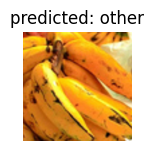

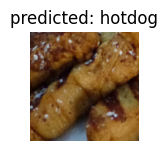

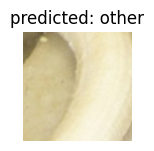

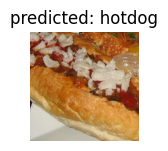

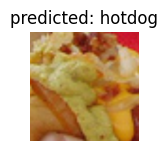

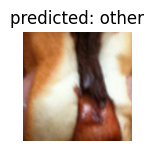

In [ ]:
visualize_model(model_ft)

## Zadanie dla chętnych (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, np. [ten](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [ten](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) (lub inny o podobnym poziomie trudności) i zamiast prostej sieci LeNet użyj bardziej złożonej, np. AlexNet, ResNet, MobileNetV2.


* Do tego zadania postanowiłem wybrać dataset Chest X-Ray Images (Pneumonia).
* Jako model wybrałem MobileNetV2.
Zadanie rozpoczynamy konfiguracją kaggle'a i pobraniem datasetu, następnie ładujemy pretrenowany model MobileNetV2

In [ ]:
! pip install -q kaggle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp "/content/drive/MyDrive/Colab Notebooks/Kaggle/kaggle.json" ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:25<00:00, 39.2MB/s]
100% 2.29G/2.29G [00:25<00:00, 97.2MB/s]


In [ ]:
! unzip -n chest-xray-pneumonia.zip

In [ ]:
pretrained_net = torchvision.models.MobileNetV2()

In [ ]:
pretrained_net

In [ ]:
class ExtendedBinaryMobileNetV2(nn.Module):
    def __init__(self, num_classes=2, hidden_dim=256):
        super(ExtendedBinaryMobileNetV2, self).__init__()

        # Use the pre-trained MobileNetV2 model
        self.mobilenet = pretrained_net

        # Modify the classifier for binary classification
        in_features = self.mobilenet.classifier[1].in_features
        self.mobilenet.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features, hidden_dim),  # Added hidden layer
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, num_classes)   # Output size is 2 for binary classification
        )

    def forward(self, x):
        return self.mobilenet(x)

# Create an instance of the extended model
extended_binary_mobilenet = ExtendedBinaryMobileNetV2()

In [ ]:
extended_binary_mobilenet

In [ ]:
import os

data_dir = "chest_xray"
batch_size = 32
model_ft = extended_binary_mobilenet.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

* Pierwszy test przeprowadziłem używając takeij samej konfiguracji jak w poprzednim zadaniu, tj. optimizer - SGD z większym lr dla ostatniej warstwy

In [ ]:
model_ft, hist = train_fine_tuning(extended_binary_mobilenet, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 0.7238 Acc: 0.2789
val Loss: 0.6920 Acc: 0.3830

Epoch 2/15
----------
train Loss: 0.6935 Acc: 0.4906
val Loss: 0.6779 Acc: 0.7340

Epoch 3/15
----------
train Loss: 0.6699 Acc: 0.7310
val Loss: 0.6691 Acc: 0.6298

Epoch 4/15
----------
train Loss: 0.6518 Acc: 0.7535
val Loss: 0.6615 Acc: 0.6250

Epoch 5/15
----------
train Loss: 0.6375 Acc: 0.7452
val Loss: 0.6584 Acc: 0.6250

Epoch 6/15
----------
train Loss: 0.6240 Acc: 0.7425
val Loss: 0.6550 Acc: 0.6250

Epoch 7/15
----------
train Loss: 0.6146 Acc: 0.7433
val Loss: 0.6518 Acc: 0.6250

Epoch 8/15
----------
train Loss: 0.6060 Acc: 0.7429
val Loss: 0.6507 Acc: 0.6250

Epoch 9/15
----------
train Loss: 0.5988 Acc: 0.7429
val Loss: 0.6497 Acc: 0.6250

Epoch 10/15
----------
train Loss: 0.5924 Acc: 0.7429
val Loss: 0.6489 Acc: 0.6250

Epoch 11/15
----------
train Loss: 0.5861 Acc: 0.7429
val Loss: 0.6477 Acc: 0.6250

Epoch 12/15
----------
train Loss: 0.5814 Acc: 0.7429
val Loss: 0.6446 Acc: 0.6250

E

Jak widać powyżej wyniki od 8 epoki wzwyż są identyczne. Dokładność na poziomie 74.29% na zbiorze treningowym, co nie jest zbyt dobrym wynikiem gdy wykrywamy zapalenie płuc. Całość zajęła niemal 30minut, a tak naprawdę szczytowa dokładność była już w 4 epoce.

Przeprowadzę jeszcze drugi test używając innego opitmizera - tym razem będzie to Adam. Użyję teraz jedynie 8 epok oraz zostawię stałą lr dla każdej warstwy

In [ ]:
def train_fine_tuning2(net, learning_rate, num_epochs=8):
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs
    )

    return model_ft, hist

In [ ]:
model_ft, hist = train_fine_tuning2(extended_binary_mobilenet, learning_rate=5e-4)

Epoch 1/8
----------
train Loss: 0.3749 Acc: 0.8303
val Loss: 0.3980 Acc: 0.8446

Epoch 2/8
----------
train Loss: 0.3198 Acc: 0.8593
val Loss: 0.4735 Acc: 0.8317

Epoch 3/8
----------
train Loss: 0.3194 Acc: 0.8560
val Loss: 0.4550 Acc: 0.8301

Epoch 4/8
----------
train Loss: 0.3079 Acc: 0.8614
val Loss: 0.4757 Acc: 0.8205

Epoch 5/8
----------
train Loss: 0.2910 Acc: 0.8696
val Loss: 0.4692 Acc: 0.8141

Epoch 6/8
----------
train Loss: 0.2821 Acc: 0.8762
val Loss: 0.3789 Acc: 0.8526

Epoch 7/8
----------
train Loss: 0.2733 Acc: 0.8792
val Loss: 0.4416 Acc: 0.8413

Epoch 8/8
----------
train Loss: 0.2648 Acc: 0.8844
val Loss: 0.5087 Acc: 0.8446

Training complete in 13m 48s
Best val Acc: 0.852564


Jak widać mamy tu wzrost dokładności o 10% używając nowego optimizera - Adama. Wyniki te są już lepsze jednak w dalszym ciągu 85% to nie jest szczególnie wysoka wartość, gdy wykrywamy chorobę.